In [155]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


In [2]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [3]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [4]:
#Template for getting some data
df = get_data("""select * from data_working_update LIMIT 50000""", 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [5]:
data = df.copy()
data.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'id_parcelle', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
data.shape

(50000, 17)

In [7]:
data[data['id_mutation'] == '2016-62756']

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
998,2016-62756,2016-07-21,Vente,547000,CHE DES ECOLIERS,0417,6140,6157,Vence,6,06157000BI0080,Maison,108,5,731,7.125507,43.727813
999,2016-62756,2016-07-21,Vente,547000,CHE DES ECOLIERS,0417,6140,6157,Vence,6,06157000BI0080,Maison,108,5,502,7.125507,43.727813


# Drop duplicates

## id_mutation

In [8]:
def drop_duplicates(df, col_name):
    return df.drop_duplicates(subset=[col_name])

data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

(40717, 17)

In [9]:
df2 = data.copy()

In [40]:
#Template for getting some data
df = get_data("""select * from data_working_update WHERE nom_commune IN 
('Paris 9e Arrondissement','Paris 8e Arrondissement',
 'Paris 7e Arrondissement','Paris 6e Arrondissement',
 'Paris 5e Arrondissement', 'Paris 4e Arrondissement',
 'Paris 3e Arrondissement','Paris 2e Arrondissement',
 'Paris 20e Arrondissement', 'Paris 1er Arrondissement',
 'Paris 19e Arrondissement','Paris 18e Arrondissement',
 'Paris 17e Arrondissement',
 'Paris 16e Arrondissement', 'Paris 15e Arrondissement',
 'Paris 14e Arrondissement','Paris 13e Arrondissement',
 'Paris 12e Arrondissement', 'Paris 11e Arrondissement',
 'Paris 10e Arrondissement', 
 'Nice',
 'Marseille 9e Arrondissement','Marseille 8e Arrondissement', 'Marseille 7e Arrondissement',
 'Marseille 6e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 4e Arrondissement',
 'Marseille 3e Arrondissement', 'Marseille 2e Arrondissement','Marseille 1er Arrondissement',
 'Marseille 16e Arrondissement','Marseille 15e Arrondissement','Marseille 14e Arrondissement',
 'Marseille 13e Arrondissement', 'Marseille 12e Arrondissement','Marseille 11e Arrondissement',
 'Marseille 10e Arrondissement') """, 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [41]:
data = df.copy()
data.shape

(292510, 17)

In [42]:
data = drop_duplicates(df=data, col_name = 'id_mutation')
df2 = data.copy()
df2.shape

(263337, 17)

# Visualization

## Plotting out 'nombre_pieces_principales', 'valeur_fonciere' 

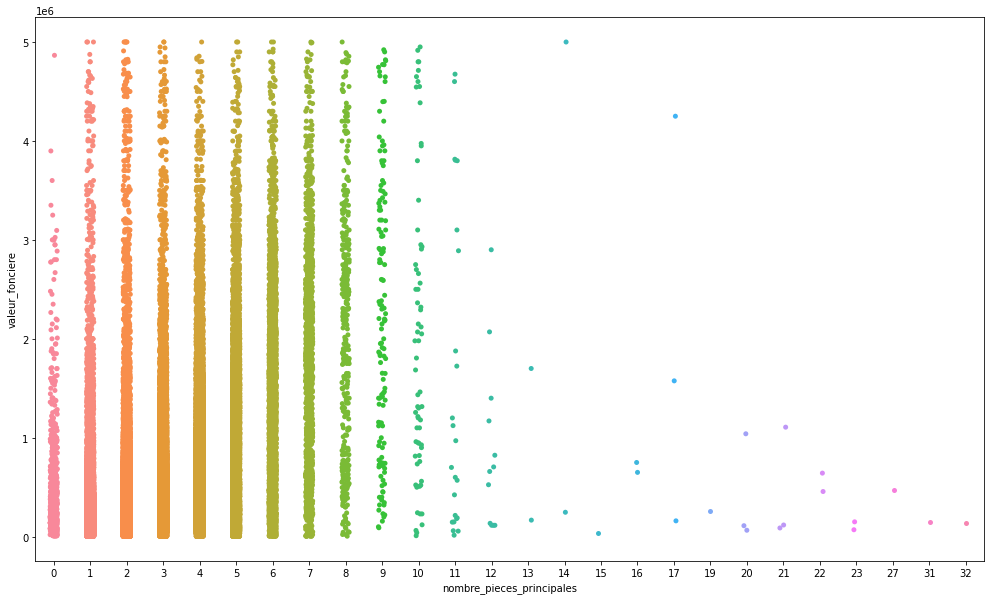

In [43]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='nombre_pieces_principales', y='valeur_fonciere',data=df2, size=5);

## Plotting out 'surface_reelle_bati', 'valeur_fonciere' 

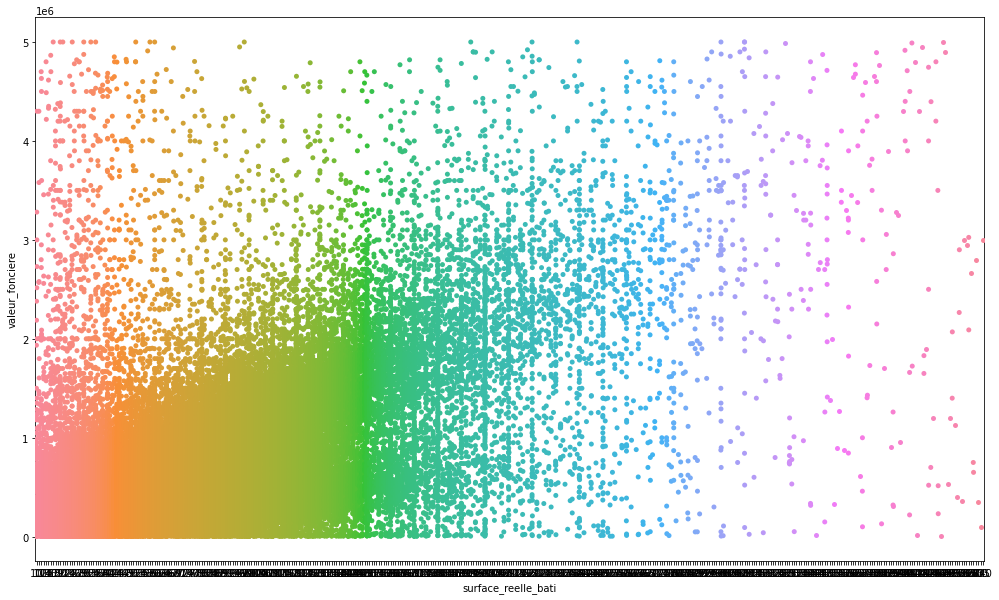

In [44]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='surface_reelle_bati', y='valeur_fonciere',data=df2, size=5);

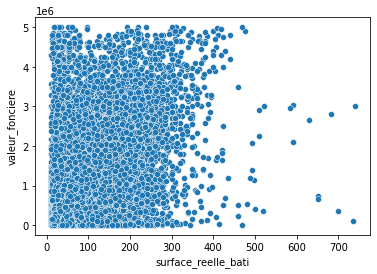

In [45]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

# Filter data, Removing outliers

In [46]:
df2=df2[
    (df2['valeur_fonciere'] < 5_000_000) & (df2['valeur_fonciere'] > 10_000)]
df2.shape

(262238, 17)

In [47]:
df2=df2[
    (df2['nombre_pieces_principales'] < 8) & (df2['nombre_pieces_principales'] > 0)]
df2.shape

(260835, 17)

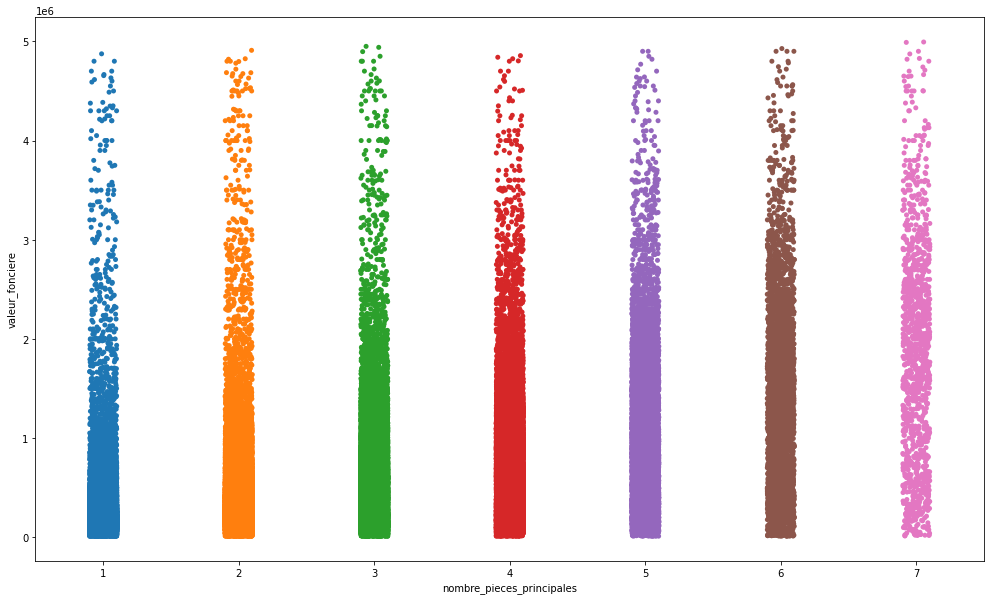

In [48]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='nombre_pieces_principales', y='valeur_fonciere',data=df2, size=5);

## Scatterplots

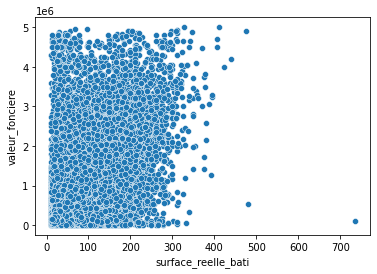

In [49]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

In [50]:
df2=df2[
    (df2['surface_reelle_bati'] < 250) & (df2['valeur_fonciere'] > 10)]
df2.shape

(260338, 17)

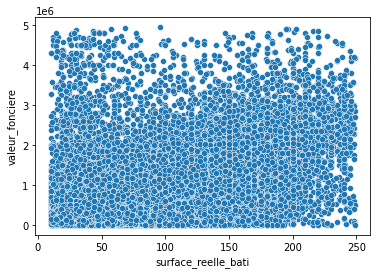

In [51]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

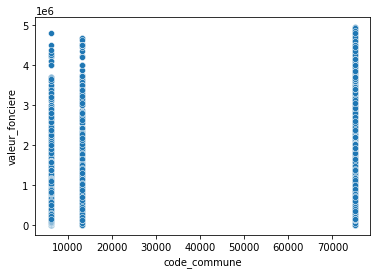

In [52]:
sns.scatterplot(x=df2['code_commune'], y=df2['valeur_fonciere']);

In [55]:
df2 = df2.drop(columns = 'nature_mutation')
df2.shape

(260338, 16)

In [56]:
df2.head()

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2016-36031,2016-01-05,129000,RUE DU CHATEAU,1335,6300,6088,Nice,6,06088000KR0130,Appartement,38,1,0,7.277516,43.696437
1,2016-36032,2016-01-07,154000,AV DES ARENES DE CIMIEZ,0325,6000,6088,Nice,6,06088000LE0233,Appartement,38,2,0,7.279226,43.705106
2,2016-36035,2016-01-06,134000,AV RENE BOYLESVE,5420,6100,6088,Nice,6,06088000EB0093,Appartement,48,2,0,7.255168,43.717018
4,2016-36036,2016-01-08,137000,BD ARMEE DES ALPES,0360,6300,6088,Nice,6,06088000IV0440,Appartement,40,2,0,7.293505,43.708142
5,2016-36037,2016-01-08,395000,AV BROWN SEQUART,0970,6000,6088,Nice,6,06088000LR0184,Appartement,79,3,0,7.273418,43.709786


In [57]:
df2.isnull().sum()

id_mutation                  0
date_mutation                0
valeur_fonciere              0
adresse_nom_voie             0
adresse_code_voie            0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

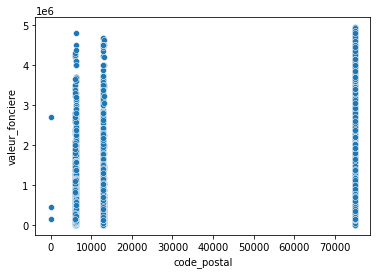

In [58]:
sns.scatterplot(x=df2['code_postal'], y=df2['valeur_fonciere']);

In [59]:
len(df2['code_postal'].unique())

41

In [60]:
len(df2['code_commune'].unique())

37

In [61]:
#Change code_postal to str df2['code_postal'].dtype
df2['code_postal'] = df2['code_postal'].astype(str)

# Function encoding_categ_column

In [62]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res   

## code_postal

In [63]:
data_t = encoding_categ_column(df = df2, col_name = 'code_postal')
data_t.shape

(260338, 56)

In [64]:
L1 = len(df2['code_postal'].unique()) + df2.shape[1] - 1
L2 = data_t.shape[1]
assert(L1 == L2)

In [65]:
data_t2 = data_t# I add this line because this column does not exist in the updated DB 

## type_local 

In [66]:
df2.columns #['type_local'].unique()

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude',
       'latitude'],
      dtype='object')

In [67]:
data_t3 = encoding_categ_column(df = data_t2, col_name = 'type_local')
data_t3.shape

(260338, 57)

In [68]:
L1 = len(data_t2['type_local'].unique()) + data_t2.shape[1] - 1
L2 = data_t3.shape[1]
assert(L1 == L2)

**code_nature_culture_speciale**

In [74]:
data_t4 = data_t3

# Function : convert_date

In [69]:
def convert_date(string, separator):
    a = string.split(separator)
    year = a[0]
    month = a[1]
    day = a[2]
    return year, month, day

Year, Month, Day = convert_date(string = '2020-01-09', separator = '-')

In [72]:
Year, Month, Day

('2020', '01', '09')

In [75]:
data_t4.head(4)

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_commune,nom_commune,code_departement,id_parcelle,surface_reelle_bati,...,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Maison
0,2016-36031,2016-01-05,129000,RUE DU CHATEAU,1335,6088,Nice,6,06088000KR0130,38,...,0,0,0,0,0,0,0,0,1,0
1,2016-36032,2016-01-07,154000,AV DES ARENES DE CIMIEZ,0325,6088,Nice,6,06088000LE0233,38,...,0,0,0,0,0,0,0,0,1,0
2,2016-36035,2016-01-06,134000,AV RENE BOYLESVE,5420,6088,Nice,6,06088000EB0093,48,...,0,0,0,0,0,0,0,0,1,0
3,2016-36036,2016-01-08,137000,BD ARMEE DES ALPES,0360,6088,Nice,6,06088000IV0440,40,...,0,0,0,0,0,0,0,0,1,0


# Starting analysis

In [76]:
df_new = data_t4.copy()

# Feature importance (all features)

In [77]:
len(list(df_new.columns))

57

In [78]:
df_new.columns[:10]

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_commune', 'nom_commune', 'code_departement',
       'id_parcelle', 'surface_reelle_bati'],
      dtype='object')

In [79]:
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle',
 ]

for i in columns_todrop:
    cols.remove(i)
 

In [80]:
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

In [81]:
len(cols_removd_target), len(cols)

(48, 49)

In [82]:
data_v2 = df_new[cols]

In [83]:
y = data_v2['valeur_fonciere']

In [84]:
X = data_v2[cols_removd_target]

In [85]:
X.shape

(260338, 48)

In [86]:
y.shape

(260338,)

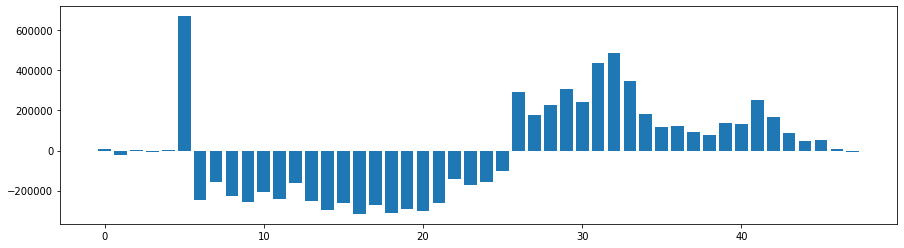

In [87]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

#X = data[mask_columns]
#y = data['valeur_fonciere'] # define the model

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
 #   print(cols_target[i], 'Feature: %0d, Score: %.5f' % (i,v))

fig, ax = plt.subplots(figsize = (15,4))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [88]:
len(importance.tolist())

48

In [89]:
#display the sorted importance-features 

J = importance.tolist()
K = []
F = []

print("len(J) : ", len(J))
for i in J:
    K.append(np.abs(i))
      
ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
K.sort(reverse= True)
print("len(K) : ", len(K), "len(ind) : ", len(ind))


for i in ind:
    F.append(cols_removd_target[i])
#np.asarray(F) # list of important features, by decreasing order
print(len(F))

len(J) :  48
len(K) :  48 len(ind) :  48
48


In [90]:
np.argmax(K), max(K), np.argmin(K), min(K) # check the lists : ind, K, F and J

(0, 670258.187061942, 47, 141.124187772585)

In [91]:
ind[0], ind[-1], K[0], K[-1], F[0], F[-1] # check the lists : ind, K, F and J

(5, 2, 670258.187061942, 141.124187772585, '0', 'surface_terrain')

In [92]:
cols_removd_target[ind[0]], cols_removd_target[ind[-1]] # check the lists : ind, K, F and J

('0', 'surface_terrain')

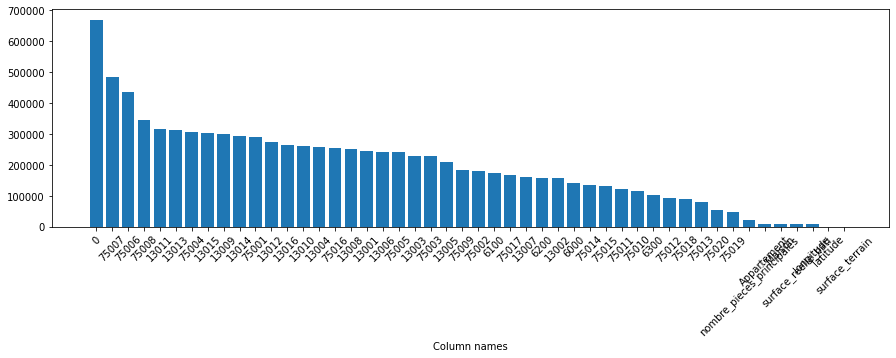

In [93]:
fig, ax = plt.subplots(figsize = (15,4))
# plot feature importance
pyplot.bar([x for x in range(len(K))], K)
pyplot.xlabel("Column names")
pyplot.xticks(range(len(ind)), F,
  rotation = 45)
pyplot.show()

In [94]:
res = K / max(K)
#res

In [95]:
dicts_K = {'columns': F, 'coef_(%)': res}
   
result = pd.DataFrame.from_dict(dicts_K)

result

,columns,coef_(%)
0,0,1.000000
1,75007,0.723262
2,75006,0.651645
3,75008,0.516633
4,13011,0.472223
5,13013,0.465611
6,75004,0.455124
7,13015,0.451082
8,13009,0.446771
9,13014,0.438742


In [96]:
R = result['columns'][-5:]
columns_todrop = list(R)
columns_todrop

['Maison', 'surface_reelle_bati', 'longitude', 'latitude', 'surface_terrain']

# Multi-colinearity  

In [97]:
#pip install statsmodels

In [98]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [99]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [100]:
X.shape

(260338, 48)

In [101]:
X.iloc[:,:].shape

(260338, 48)

In [102]:
#X = X.iloc[:,:-1]
C = calc_vif(X.iloc[:,:])
C

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,surface_reelle_bati,3.895371
1,nombre_pieces_principales,3.764978
2,surface_terrain,1.181514
3,longitude,353.431482
4,latitude,16.109669
5,0,inf
6,13001,inf
7,13002,inf
8,13003,inf
9,13004,inf


In [103]:
columns_todrop

['Maison', 'surface_reelle_bati', 'longitude', 'latitude', 'surface_terrain']

In [104]:
#sort dataframe
sorted_VIF = C.sort_values(by='VIF', ascending= False)
sorted_VIF

,Features,VIF
24,6200,inf
36,75011,inf
27,75002,inf
28,75003,inf
29,75004,inf
30,75005,inf
31,75006,inf
32,75007,inf
33,75008,inf
34,75009,inf


**For info :** 
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [105]:
#instantiating train test split while creating my X and y train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-2.4032166922483e-05

In [106]:
model = LinearRegression().fit(X_train, y_train) # instantiate and fit model 

model.score(X_test, y_test) # Score model

0.6079440834679672

In [107]:
from sklearn.preprocessing import StandardScaler

#instantiating the standard scaler and setting it equal to ss
#scaling my Xs
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [108]:
baseline_model.fit(X_train_sc, y_train) # Calculate value for stratgy
baseline_model.score(X_test_sc, y_test) # Score model based on consistently predicting the strategy

-2.4032166922483e-05

In [109]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
for model in models:
    fitter = model.fit(X_train_sc,y_train)
    print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
    print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
    print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6427592855011259.0, tolerance: 3452735487253.161
  model = cd_fast.enet_coordinate_descent(


Lasso() R2 score is: 0.608)
Lasso() rmse score is: 72886670648.583)
Lasso() mape score is: 1.388
Ridge() R2 score is: 0.608)
Ridge() rmse score is: 72885081024.42)
Ridge() mape score is: 1.76
LinearRegression() R2 score is: 0.608)
LinearRegression() rmse score is: 72884997127.985)
LinearRegression() mape score is: 1.394


# Function feature_selection

In [110]:
def feature_selection(df, col_list, target_var , model): #df : dataframe & col_list : list of columns to evaluate their importance
    
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]

    # define model
    if model == "LinearRegression":
        model = LinearRegression()
        # fit the model
        model.fit(X, y)
        # get importance
        importance = model.coef_
        # summarize feature importance
        #for i,v in enumerate(importance):
            #print(cols[i], 'Feature: %0d, Score: %.5f' % (i,v))

        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

        #display the sorted importance-features 

        J = importance.tolist()
        K = []
        F = []
        
        for i in J:
            K.append(np.abs(i))

        ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
        K.sort(reverse= True)
        
        for i in ind:
            F.append(col_list[i])
  
        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        pyplot.bar([x for x in range(len(K))], K)
        pyplot.xlabel("Column names")
        pyplot.xticks(range(len(ind)), F,
          rotation = 45)
        pyplot.show()
            
        res = K / max(K)

        dicts_K = {'columns': F, 'coef_(%)': res}
        result = pd.DataFrame.from_dict(dicts_K, )

        R = result['columns'][-5:]
        columns_todrop = list(R)        
        
        # Calculating VIF
        vif = pd.DataFrame()
        vif["columns"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        #C = calc_vif(X.iloc[:,:])
        C = calc_vif(X)
        #sort dataframe
        sorted_VIF = C.sort_values(by='VIF', ascending= False)


    return result, sorted_VIF, columns_todrop 


In [112]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]


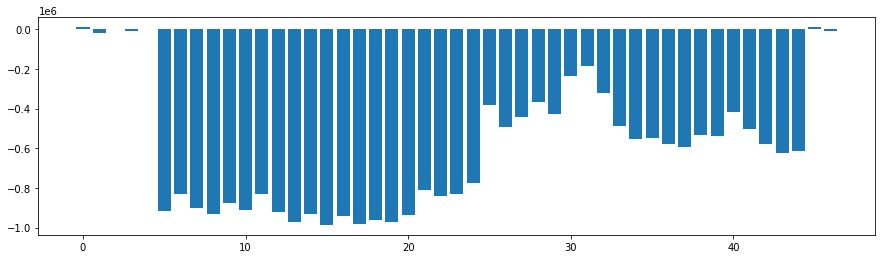

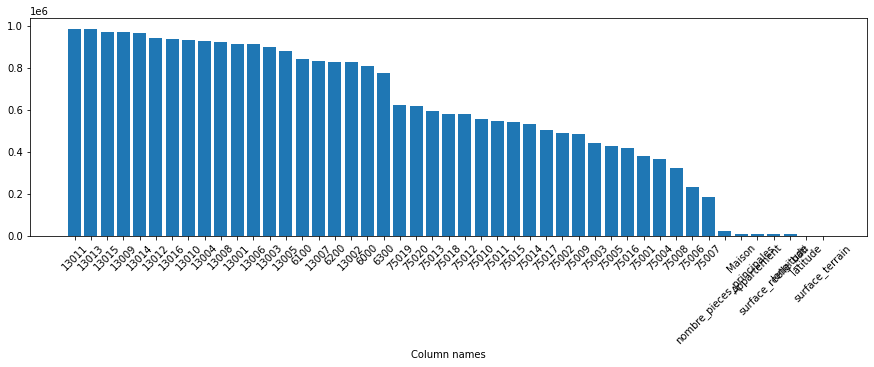

In [113]:
result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

In [114]:
result

,columns,coef_(%)
0,13011,1.000000
1,13013,0.995509
2,13015,0.985640
3,13009,0.982711
4,13014,0.977258
5,13012,0.955848
6,13016,0.947096
7,13010,0.944476
8,13004,0.941966
9,13008,0.934042


In [115]:
columns_todrop

['Appartement',
 'surface_reelle_bati',
 'longitude',
 'latitude',
 'surface_terrain']

In [116]:
sorted_VIF

,Features,VIF
45,Appartement,84139.633091
42,75018,5548.501653
39,75015,5313.465918
21,6000,5043.034081
41,75017,4446.338621
40,75016,4408.319795
35,75011,4170.421925
44,75020,3400.989755
46,Maison,3390.552105
43,75019,2948.522910


# Function apply_regression_model

In [117]:
def apply_regression_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    for model in models:
        fitter = model.fit(X_train_sc,y_train)
        print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
        print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
        print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
        print(11*"** **")
        
        
la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
    
apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6422584866623473.0, tolerance: 3452735487253.161
  model = cd_fast.enet_coordinate_descent(


Lasso() R2 score is: 0.608)
Lasso() rmse score is: 72886667346.574)
Lasso() mape score is: 1.377
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.608)
Ridge() rmse score is: 72885002681.21)
Ridge() mape score is: 2.604
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.608)
LinearRegression() rmse score is: 72885078408.371)
LinearRegression() mape score is: 1.524
** **** **** **** **** **** **** **** **** **** **** **


# New simulation "removing column code postal 0 && 'Appartement'


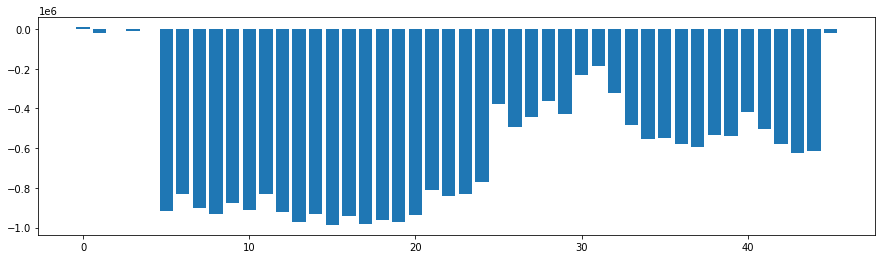

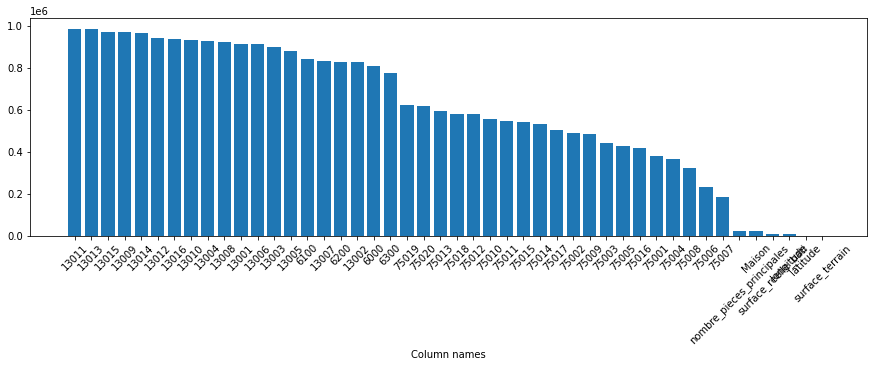

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6422584866623456.0, tolerance: 3452735487253.161
  model = cd_fast.enet_coordinate_descent(


Lasso() R2 score is: 0.608)
Lasso() rmse score is: 72886667346.574)
Lasso() mape score is: 1.377
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.608)
Ridge() rmse score is: 72885002744.952)
Ridge() mape score is: 2.603
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.608)
LinearRegression() rmse score is: 72885078408.371)
LinearRegression() mape score is: 1.524
** **** **** **** **** **** **** **** **** **** **** **


In [118]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [119]:
result

,columns,coef_(%)
0,13011,1.000000
1,13013,0.995509
2,13015,0.985640
3,13009,0.982711
4,13014,0.977258
5,13012,0.955848
6,13016,0.947096
7,13010,0.944476
8,13004,0.941966
9,13008,0.934042


In [120]:
columns_todrop

['Maison', 'surface_reelle_bati', 'longitude', 'latitude', 'surface_terrain']

In [121]:
sorted_VIF

,Features,VIF
4,latitude,2858.631936
3,longitude,1691.782043
42,75018,89.914612
39,75015,87.485187
40,75016,72.731763
41,75017,72.513283
35,75011,65.479975
21,6000,60.516452
44,75020,52.783830
43,75019,45.748813


In [127]:
data_v2.columns

Index(['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales',
       'surface_terrain', 'longitude', 'latitude', '13001', '13002', '13003',
       '13004', '13005', '13006', '13007', '13008', '13009', '13010', '13011',
       '13012', '13013', '13014', '13015', '13016', '6000', '6100', '6200',
       '6300', '75001', '75002', '75003', '75004', '75005', '75006', '75007',
       '75008', '75009', '75010', '75011', '75012', '75013', '75014', '75015',
       '75016', '75017', '75018', '75019', '75020', 'Maison'],
      dtype='object')

# Relevant features

## Pearson_correlation_matrix

In [149]:
data_v2.columns

Index(['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales',
       'surface_terrain', 'longitude', 'latitude', '13001', '13002', '13003',
       '13004', '13005', '13006', '13007', '13008', '13009', '13010', '13011',
       '13012', '13013', '13014', '13015', '13016', '6000', '6100', '6200',
       '6300', '75001', '75002', '75003', '75004', '75005', '75006', '75007',
       '75008', '75009', '75010', '75011', '75012', '75013', '75014', '75015',
       '75016', '75017', '75018', '75019', '75020', 'Maison'],
      dtype='object')

In [147]:
def pearson_correlation_matrix_of_dataframe(size_x,size_y,df,var_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = df.corr()
    sns.heatmap(abs(round(cor, 2)), annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[var_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print("relevant_features : ")
    return pd.DataFrame(relevant_features)

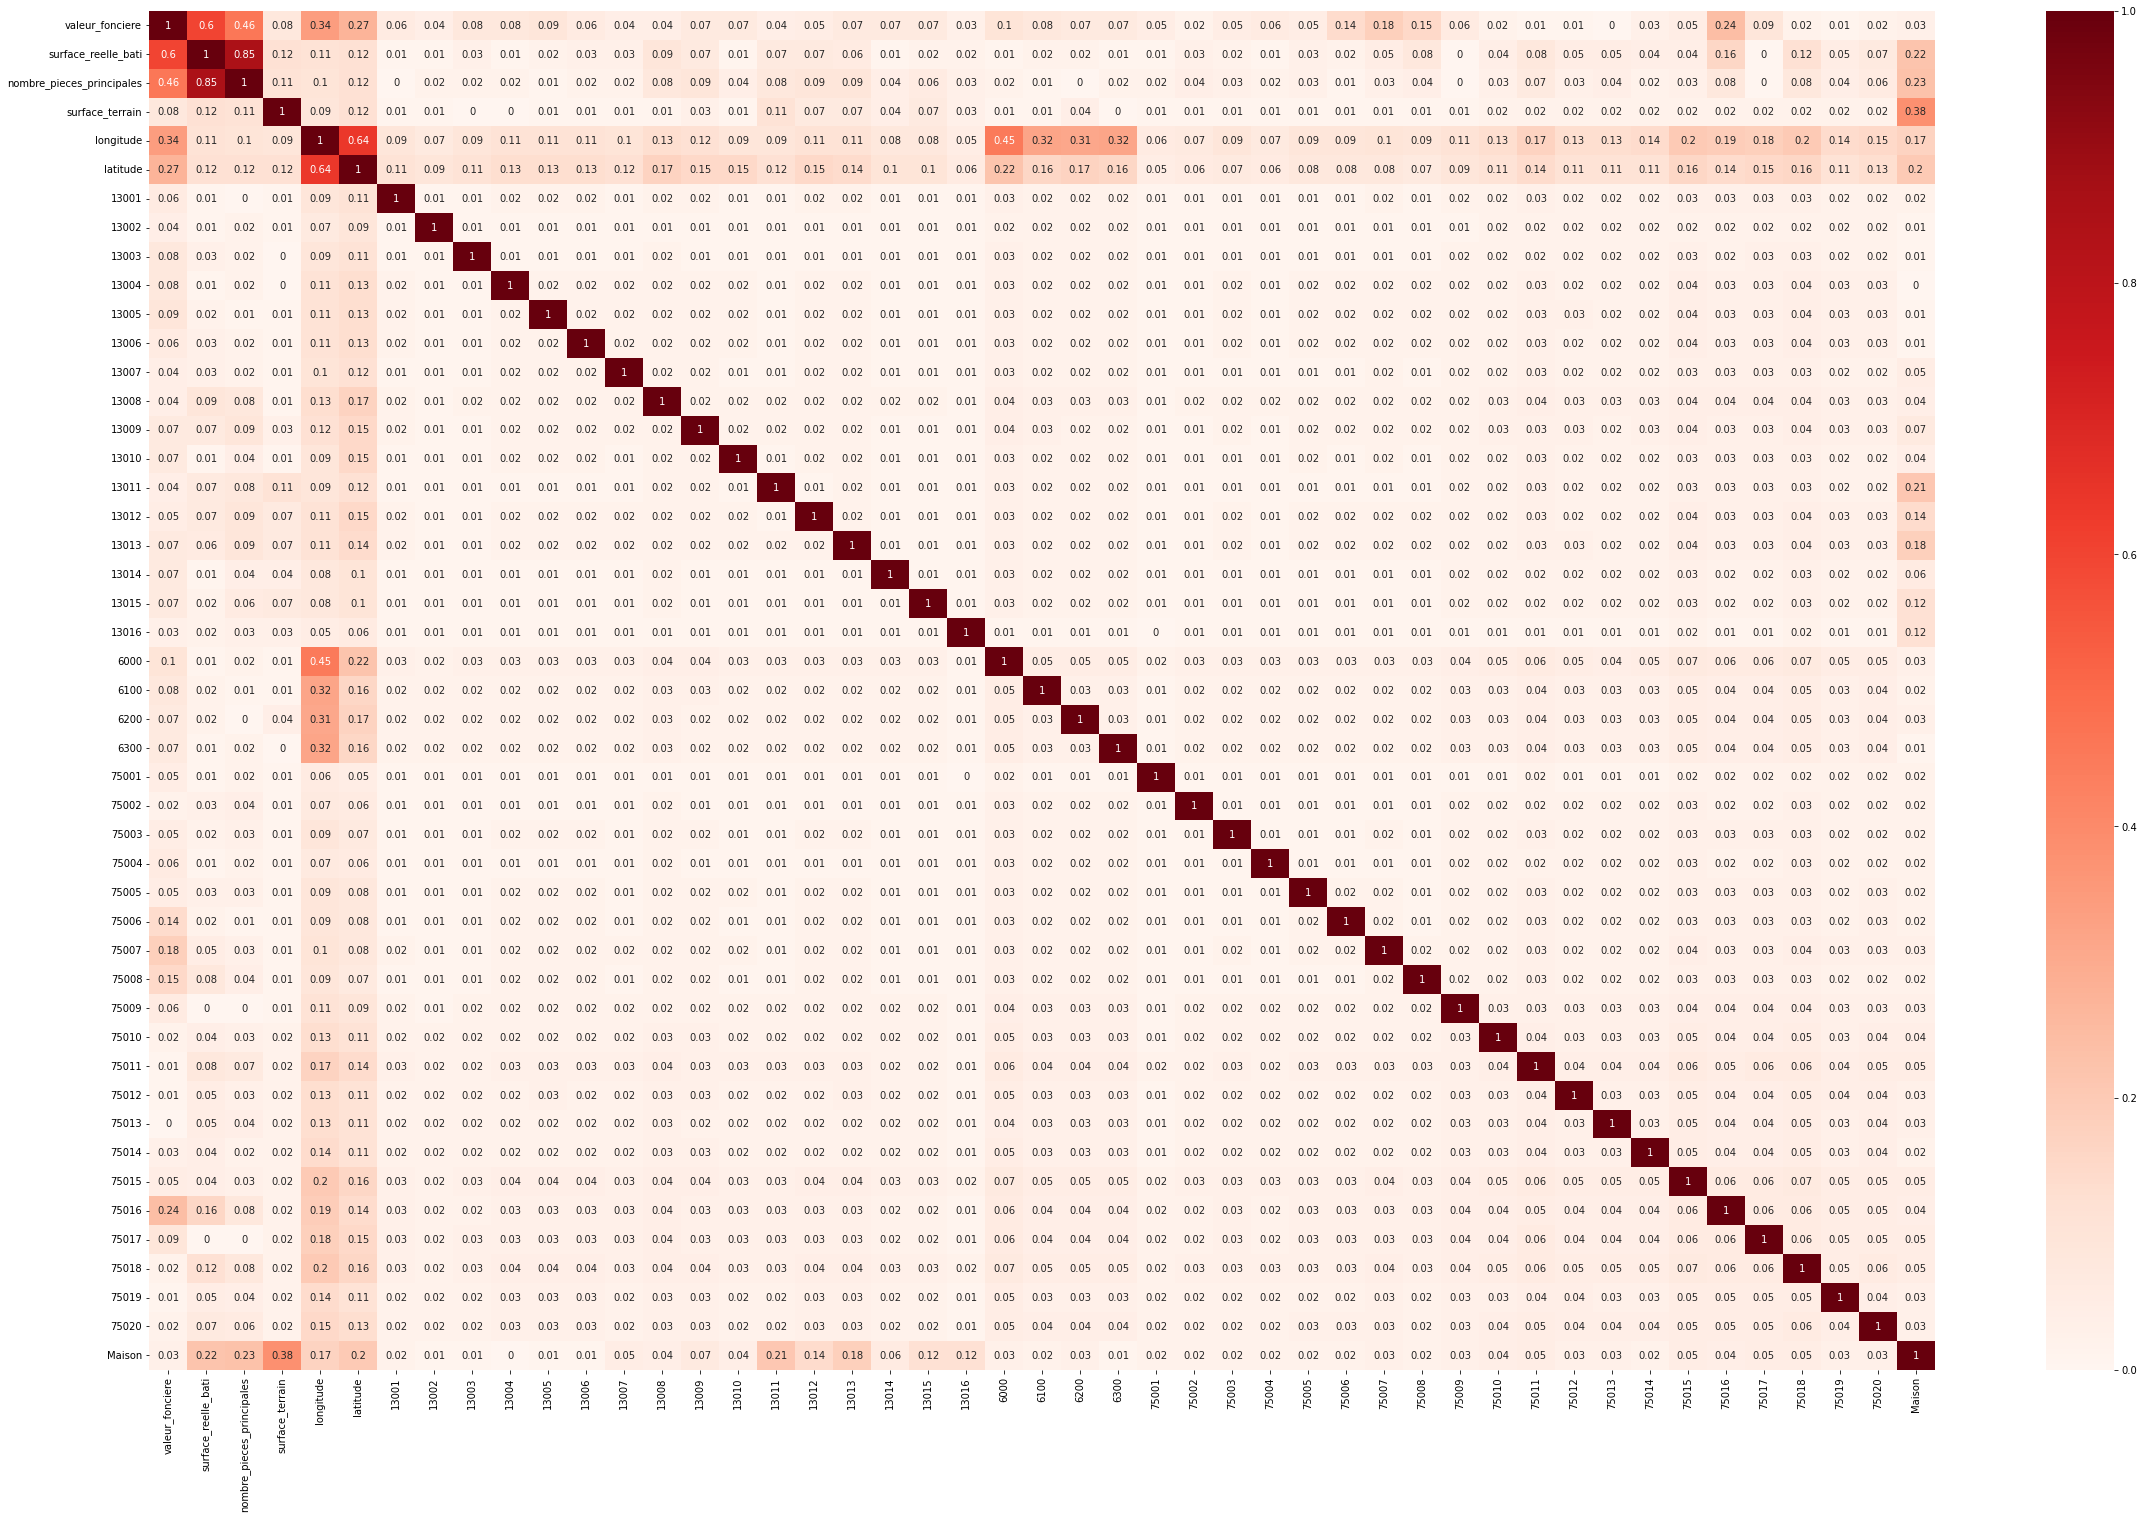

relevant_features : 


,valeur_fonciere
valeur_fonciere,1.000000
surface_reelle_bati,0.600520
nombre_pieces_principales,0.463997
longitude,0.336573
latitude,0.272367
75016,0.240164


In [148]:
relevant_features = pearson_correlation_matrix_of_dataframe(40,25,
                                              df= data_v2,
                                              var_target = "valeur_fonciere",
                                              correlation_minimum_criteria = 0.2)
relevant_features

## Random Forest

### Instantiate and fit the Random Forest model

In [153]:
# Define dataset parameters
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

col_list = cols_removd_target
target_var = "valeur_fonciere"
    
df = data_v2
# define dataset
y = df[target_var]
X = df[col_list]
    

#instantiating train test split while creating my X and y train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#instantiating the standard scaler and setting it equal to ss
#scaling my Xs
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
    
# define model
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#Fitting the Random Forest model
random_forest.fit(X_train_sc,y_train)

# Use the model on the testing data to predict the results

y_pred = model.predict(X_test_sc) # corrected in the next cell

# Print the R2 score 
print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
print ("\n")

# Print the mean squared error
print ("Mean-squared error:\n")
print(mean_squared_error(y_test, y_pred))


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 48 is different from 46)

In [154]:
# Use the model on the testing data to predict the results

y_pred = random_forest.predict(X_test_sc)

# Print the R2 score 
print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
print ("\n")

# Print the mean squared error
print ("Mean-squared error:\n")
print(mean_squared_error(y_test, y_pred))


R2 score:



NameError: name 'r2_score' is not defined

In [156]:
print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
print ("\n")

# Print the mean squared error
print ("Mean-squared error:\n")
print(rmse(y_test, y_pred))

70.71 %


Mean-squared error:

54460587752.197266


In [158]:
# Print the mean absolute error
print ("Mean-absolute error:\n")
print(mape(y_test, y_pred))

Mean-absolute error:

0.4428303479657344


In [160]:
random_forest.score(X_test_sc, y_test)

0.7070512083909811

### Features importance of the Random Forest model

In [157]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                           importance
surface_reelle_bati          0.483065
latitude                     0.224888
longitude                    0.182602
surface_terrain              0.052467
nombre_pieces_principales    0.017352
75007                        0.008530
75006                        0.006906
Maison                       0.004521
75008                        0.002130
75004                        0.001452
75001                        0.001299
13002                        0.001185
75016                        0.001069
75011                        0.001015
75005                        0.000952
75010                        0.000901
13007                        0.000866
75003                        0.000765
75015                        0.000754
75019                        0.000720
13008                        0.000672
75017                        0.000643
75014                        0.000572
75018                        0.000571
75009                        0.000520
75002       

### Defining a function to print out the results of the Random forest model

In [159]:
def apply_randomforest_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    # define model
    random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

    #Fitting the Random Forest model
    random_forest.fit(X_train_sc,y_train)

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test_sc)

    # Print the R2 score 
    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
    print ("\n")

    # Print the mean squared error
    print ("Mean-squared error:\n")
    print(rmse(y_test, y_pred))
    
    # Print the mean absolute error
    print ("Mean-absolute error:\n")
    print(mape(y_test, y_pred))
    
    
    feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

    print(feature_importances)

### Defining a function to print out the results of the Random forest and Linear regression models

In [ ]:
def apply_linRegression_randomforest_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    # define model
    if model == "LinearRegression":
        la= Lasso()
        ri = Ridge()
        lr = LinearRegression()
        models = [la,ri,lr]
        
        for model in models:
            fitter = model.fit(X_train_sc,y_train)
            print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
            print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
            print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
            print(11*"** **")
            
    if model == "RandomForest":    
        random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = model.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))


        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)

### Hyperparameters tuning the Random Forest model


*Next notebook !*

# New simulation 

In [ ]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_linRegression_randomforest_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [ ]:
result

In [ ]:
sorted_VIF

In [ ]:
columns_todrop